<a href="https://colab.research.google.com/github/xing-wang-kai/DEEPLEARN_ANALISE_PREDITIVA/blob/main/previsoes_passageiros.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np

data = pd.read_csv('https://raw.githubusercontent.com/alura-cursos/deeptime/aula1/Passageiros.csv')
data.head()

,tempo,passageiros
0,1949.000000,112
1,1949.083333,118
2,1949.166667,132
3,1949.250000,129
4,1949.333333,121


<Axes: xlabel='tempo', ylabel='passageiros'>

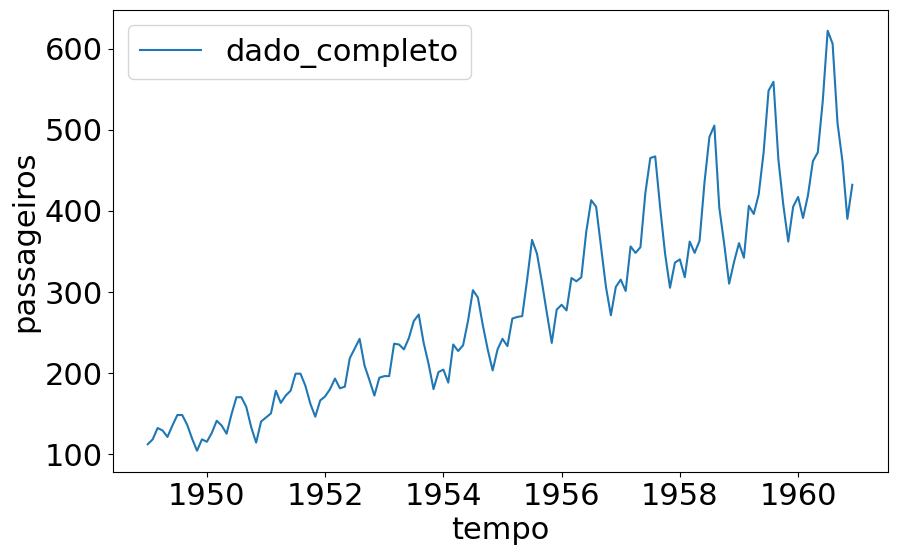

In [3]:
import seaborn as sns
import matplotlib as mpl

mpl.rcParams['figure.figsize'] = (10,6)
mpl.rcParams['font.size'] = 22

sns.lineplot(x='tempo', y='passageiros', data=data, label='dado_completo')

In [4]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(data)
data_scaler = sc.transform(data)

In [5]:
x = data_scaler[:, 0]
y = data_scaler[:, 1]

<Axes: xlabel='Data', ylabel='Passageiros'>

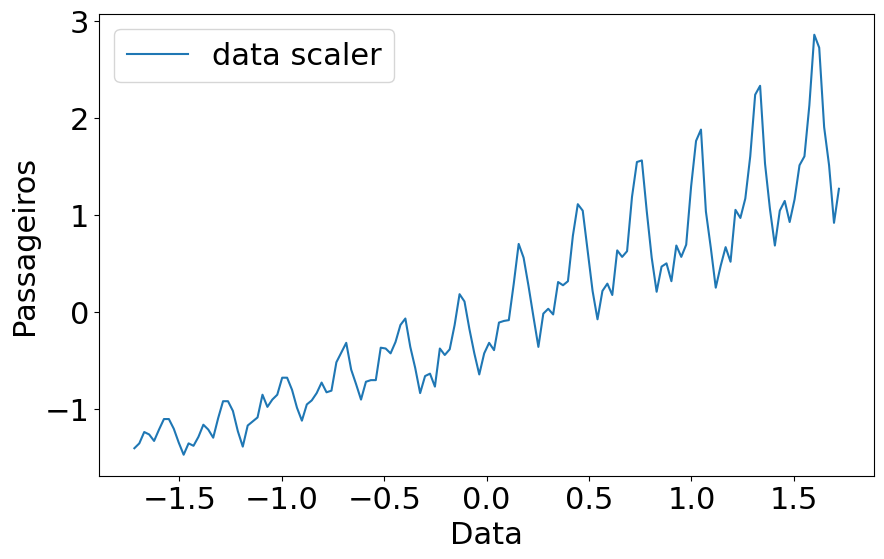

In [6]:
import matplotlib.pyplot as plt

plt.ylabel('Passageiros')
plt.xlabel('Data')

sns.lineplot(x=x, y=y, label='data scaler')

In [7]:
len(x)*0.1-len(x)

-129.6

In [8]:
from sklearn.model_selection import train_test_split

SEED = 200
np.random.seed(SEED)

tamanho_treino = int(len(data)*0.9)
tamanho_test =  int(len(data) - tamanho_treino)

print(f'tamanho treino: {tamanho_treino}')
print(f'tamanho test  : {tamanho_test}')

x_train = x[0:tamanho_treino]
x_test  = x[tamanho_treino: len(data)]
y_train = y[0:tamanho_treino]
y_test  = y[tamanho_treino: len(data)]

print(f'FEATURES TRAIN: {x_train.shape}')
print(f'FEATURES TEST : {x_test.shape}')
print(f'CLASS TRAIN   : {y_train.shape}')
print(f'CLASS TEST    : {y_test.shape}')

tamanho treino: 129
tamanho test  : 15
FEATURES TRAIN: (129,)
FEATURES TEST : (15,)
CLASS TRAIN   : (129,)
CLASS TEST    : (15,)


<Axes: xlabel='Data', ylabel='Passageiros'>

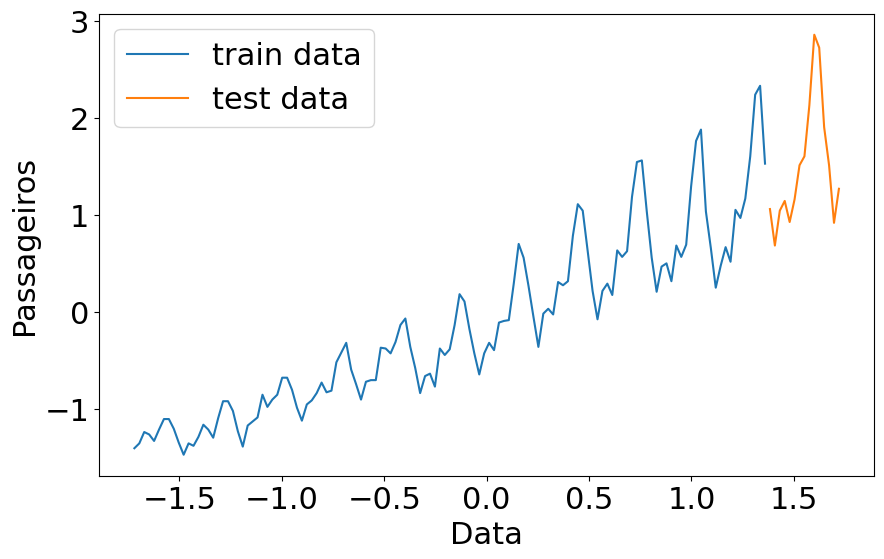

In [9]:
import matplotlib.pyplot as plt

plt.ylabel('Passageiros')
plt.xlabel('Data')

sns.lineplot(x=x_train, y=y_train, label='train data')
sns.lineplot(x=x_test, y=y_test, label='test data')

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

regress = Sequential()

regress.add(Dense(1, input_dim=1,
                  kernel_initializer='Ones',
                  activation='linear',
                  use_bias=False))


In [11]:
regress.compile(loss='mean_squared_error', optimizer='adam')

In [12]:
regress.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 1         
                                                                 
Total params: 1 (4.00 Byte)
Trainable params: 1 (4.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [13]:
regress.fit(x_train, y_train)

5/5 [==============================] - 1s 11ms/step - loss: 0.1284


In [14]:
y_predict = regress.predict(x_train)

5/5 [==============================] - 0s 8ms/step


<Axes: >

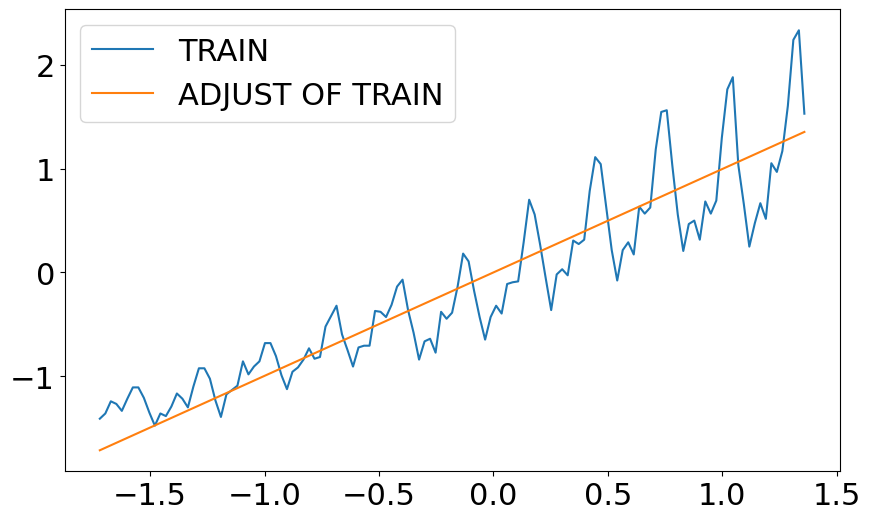

In [15]:
sns.lineplot(x=x_train, y=y_train, label='TRAIN')
sns.lineplot(x=x_train, y=y_predict[:, 0], label='ADJUST OF TRAIN')

In [16]:
data_information = {'TEMPO': x_train, 'PASSAGEIROS': y_predict[:, 0]}

results = pd.DataFrame(data_information)
results.head()

,TEMPO,PASSAGEIROS
0,-1.720064,-1.711851
1,-1.696007,-1.687909
2,-1.671950,-1.663967
3,-1.647894,-1.640025
4,-1.623837,-1.616083


In [17]:
predict_test_y = regress.predict(x_test)

data_information_v2 = {'TEMPO': x_test, 'PASSAGEIROS': predict_test_y[:,0]}

results_predict_test = pd.DataFrame(data_information_v2)
results_transform = sc.inverse_transform(results_predict_test)
inverse_results_transform = pd.DataFrame(data=results_transform, columns=['tempo', 'passageiros'])
inverse_results_transform.head()

1/1 [==============================] - 0s 31ms/step


,tempo,passageiros
0,1959.750000,444.877435
1,1959.833333,447.739678
2,1959.916667,450.601920
3,1960.000000,453.464148
4,1960.083333,456.326405


In [18]:
inverse_transf = sc.inverse_transform(results)

inverse_transf = pd.DataFrame(data=inverse_transf, columns=['tempo', 'passageiros'])

In [19]:
inverse_transf.head()

,tempo,passageiros
0,1949.000000,75.648422
1,1949.083333,78.510650
2,1949.166667,81.372907
3,1949.250000,84.235135
4,1949.333333,87.097392


<Axes: xlabel='tempo', ylabel='passageiros'>

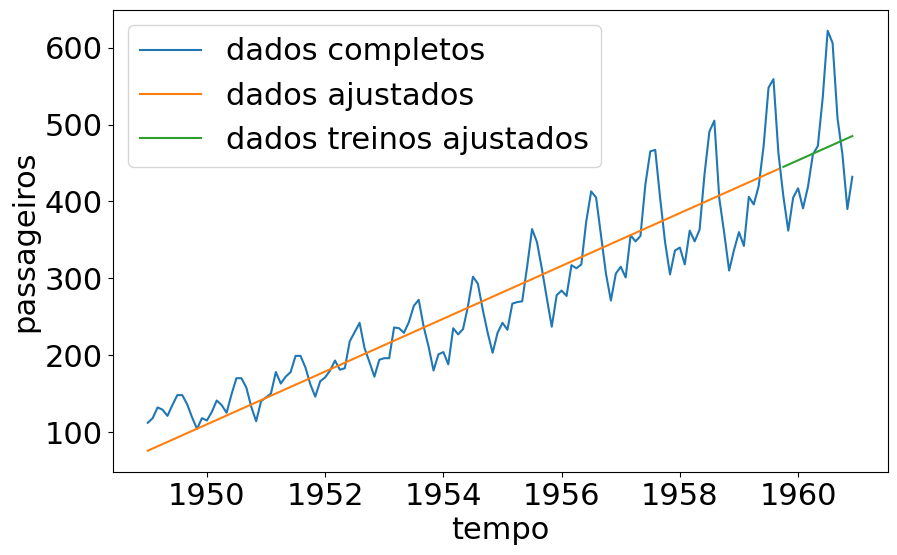

In [20]:
sns.lineplot(x='tempo', y='passageiros', data=data, label='dados completos')
sns.lineplot(x='tempo', y='passageiros', data=inverse_transf, label='dados ajustados')
sns.lineplot(x='tempo', y='passageiros', data=inverse_results_transform, label='dados treinos ajustados')

In [21]:
regress_v2 = Sequential()

regress_v2.add(Dense(8, input_dim=1,
                  kernel_initializer='random_uniform',
                  activation='sigmoid',
                  use_bias=False))
regress_v2.add(Dense(8, input_dim=1,
                  activation='sigmoid',
                  use_bias=False))
regress_v2.add(Dense(1, input_dim=1,
                  activation='linear',
                  use_bias=False))

regress_v2.compile(loss='mean_squared_error', optimizer='adam')
regress_v2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 8)                 8         
                                                                 
 dense_2 (Dense)             (None, 8)                 64        
                                                                 
 dense_3 (Dense)             (None, 1)                 8         
                                                                 
Total params: 80 (320.00 Byte)
Trainable params: 80 (320.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [22]:
regress_v2.fit(x_train, y_train, epochs=200)

Epoch 1/200
5/5 [==============================] - 2s 6ms/step - loss: 1.9887
Epoch 2/200
5/5 [==============================] - 0s 5ms/step - loss: 1.9116
Epoch 3/200
5/5 [==============================] - 0s 4ms/step - loss: 1.8395
Epoch 4/200
5/5 [==============================] - 0s 5ms/step - loss: 1.7687
Epoch 5/200
5/5 [==============================] - 0s 4ms/step - loss: 1.7027
Epoch 6/200
5/5 [==============================] - 0s 4ms/step - loss: 1.6382
Epoch 7/200
5/5 [==============================] - 0s 10ms/step - loss: 1.5765
Epoch 8/200
5/5 [==============================] - 0s 5ms/step - loss: 1.5193
Epoch 9/200
5/5 [==============================] - 0s 5ms/step - loss: 1.4627
Epoch 10/200
5/5 [==============================] - 0s 6ms/step - loss: 1.4120
Epoch 11/200
5/5 [==============================] - 0s 5ms/step - loss: 1.3619
Epoch 12/200
5/5 [==============================] - 0s 8ms/step - loss: 1.3216
Epoch 13/200
5/5 [==============================] - 0s 8ms/s

In [23]:
predict_train_v1 = regress_v2.predict(x_train)
predict_test_v1 = regress_v2.predict(x_test)


1/1 [==============================] - 0s 57ms/step


<Axes: >

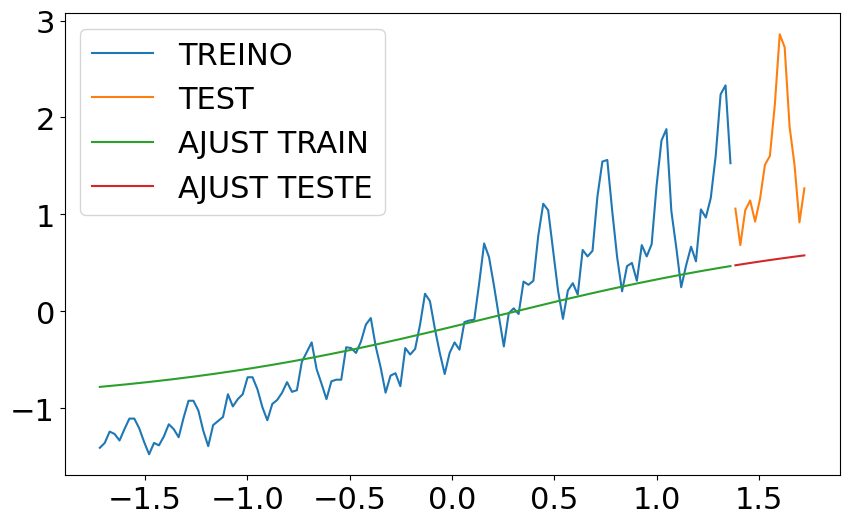

In [24]:
sns.lineplot(x=x_train, y=y_train, label='TREINO')
sns.lineplot(x=x_test, y=y_test, label='TEST')
sns.lineplot(x=x_train, y=predict_train_v1[:,0], label='AJUST TRAIN')
sns.lineplot(x=x_test, y=predict_test_v1[:,0], label='AJUST TESTE')

In [25]:
def separa_dados(vector, n_passos):
  x_novo, y_novo = [], []

  for i in range(n_passos, vector.shape[0]):
    x_novo.append(list(vector.loc[i-n_passos: i-1]))
    y_novo.append(vector.loc[i])
  x_novo, y_novo = np.array(x_novo), np.array(y_novo)
  return x_novo, y_novo

In [26]:
vector = pd.DataFrame(y_train)[0]
vector

0     -1.407779
1     -1.357590
2     -1.240483
3     -1.265578
4     -1.332496
         ...   
124    1.168570
125    1.603538
126    2.239260
127    2.331272
128    1.528255
Name: 0, Length: 129, dtype: float64

In [27]:
vector_v2 = pd.DataFrame(y_test)[0]
vector_v2

0     1.059828
1     0.683413
2     1.043098
3     1.143475
4     0.925991
5     1.160205
6     1.511525
7     1.603538
8     2.130518
9     2.858253
10    2.724417
11    1.904669
12    1.511525
13    0.917627
14    1.268947
Name: 0, dtype: float64

In [28]:

new_x_train, new_y_train = separa_dados(vector, 1)
new_x_train[0:5]

array([[-1.40777884],
       [-1.35759023],
       [-1.24048348],
       [-1.26557778],
       [-1.33249593]])

In [29]:
new_x_test, new_y_test = separa_dados(vector_v2, 1)
new_x_test

array([[1.05982773],
       [0.68341317],
       [1.04309819],
       [1.14347541],
       [0.92599144],
       [1.16020494],
       [1.5115252 ],
       [1.60353765],
       [2.13051803],
       [2.85825285],
       [2.72441656],
       [1.9046693 ],
       [1.5115252 ],
       [0.91762667]])

In [30]:
regress_v3 = Sequential([
    Dense(8, input_dim=1, kernel_initializer='Ones',activation='linear', use_bias=False),
    Dense(64, kernel_initializer='random_uniform',activation='sigmoid', use_bias=False),
    Dense(1, kernel_initializer='random_uniform',activation='linear', use_bias=False)
])

regress_v3.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
regress_v3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 8)                 8         
                                                                 
 dense_5 (Dense)             (None, 64)                512       
                                                                 
 dense_6 (Dense)             (None, 1)                 64        
                                                                 
Total params: 584 (2.28 KB)
Trainable params: 584 (2.28 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [31]:
regress_v3.fit(new_x_train, new_y_train, epochs=200)

Epoch 1/200
4/4 [==============================] - 1s 4ms/step - loss: 0.7680 - accuracy: 0.0000e+00
Epoch 2/200
4/4 [==============================] - 0s 4ms/step - loss: 0.7408 - accuracy: 0.0000e+00
Epoch 3/200
4/4 [==============================] - 0s 4ms/step - loss: 0.7200 - accuracy: 0.0000e+00
Epoch 4/200
4/4 [==============================] - 0s 5ms/step - loss: 0.6978 - accuracy: 0.0000e+00
Epoch 5/200
4/4 [==============================] - 0s 6ms/step - loss: 0.6761 - accuracy: 0.0000e+00
Epoch 6/200
4/4 [==============================] - 0s 7ms/step - loss: 0.6522 - accuracy: 0.0000e+00
Epoch 7/200
4/4 [==============================] - 0s 7ms/step - loss: 0.6278 - accuracy: 0.0000e+00
Epoch 8/200
4/4 [==============================] - 0s 5ms/step - loss: 0.6012 - accuracy: 0.0000e+00
Epoch 9/200
4/4 [==============================] - 0s 5ms/step - loss: 0.5698 - accuracy: 0.0000e+00
Epoch 10/200
4/4 [==============================] - 0s 6ms/step - loss: 0.5386 - accuracy: 

In [32]:
predict_train_v3 = regress_v3.predict(new_x_train)
predict_test_v3 = regress_v3.predict(new_x_test)

1/1 [==============================] - 0s 90ms/step


<Axes: xlabel='tempo', ylabel='0'>

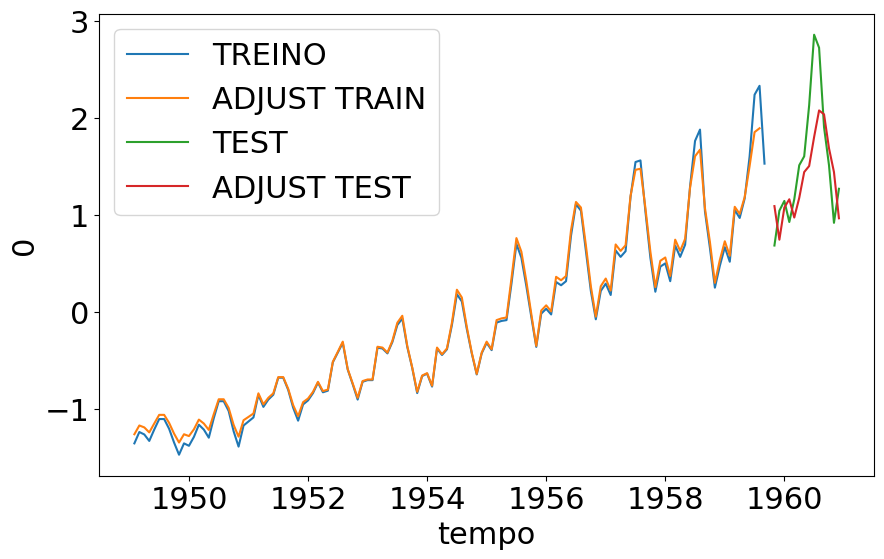

In [33]:
sns.lineplot(x='tempo', y=new_y_train, data=data[1:129], label='TREINO')
sns.lineplot(x='tempo', y=pd.DataFrame(predict_train_v3)[0], data=data[1:129], label='ADJUST TRAIN')
sns.lineplot(x='tempo', y=new_y_test, data=data[130:144], label='TEST')
sns.lineplot(x='tempo', y=pd.DataFrame(predict_test_v3)[0].values, data=data[130:144], label='ADJUST TEST')

In [34]:
new_x_train, new_y_train = separa_dados(vector, 4)
new_x_train[0:5]
new_x_test, new_y_test = separa_dados(vector_v2, 4)

## COMO AGORA PARA CADA VALOR TERMOS 4 dimensões então colocamos no input_dim=4
regress_v4 = Sequential([
    Dense(8, input_dim=4, kernel_initializer='ones',activation='linear', use_bias=False),
    Dense(64, kernel_initializer='random_uniform',activation='sigmoid', use_bias=False),
    Dense(1, kernel_initializer='random_uniform',activation='linear', use_bias=False)
])

regress_v4.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
regress_v4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 8)                 32        
                                                                 
 dense_8 (Dense)             (None, 64)                512       
                                                                 
 dense_9 (Dense)             (None, 1)                 64        
                                                                 
Total params: 608 (2.38 KB)
Trainable params: 608 (2.38 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [35]:
new_x_train[0:5]

array([[-1.40777884, -1.35759023, -1.24048348, -1.26557778],
       [-1.35759023, -1.24048348, -1.26557778, -1.33249593],
       [-1.24048348, -1.26557778, -1.33249593, -1.21538918],
       [-1.26557778, -1.33249593, -1.21538918, -1.10664719],
       [-1.33249593, -1.21538918, -1.10664719, -1.10664719]])

In [36]:
regress_v4.fit(new_x_train, new_y_train, epochs=200)

Epoch 1/200
4/4 [==============================] - 1s 4ms/step - loss: 0.7706 - accuracy: 0.0000e+00
Epoch 2/200
4/4 [==============================] - 0s 5ms/step - loss: 0.6911 - accuracy: 0.0000e+00
Epoch 3/200
4/4 [==============================] - 0s 6ms/step - loss: 0.6178 - accuracy: 0.0000e+00
Epoch 4/200
4/4 [==============================] - 0s 10ms/step - loss: 0.5595 - accuracy: 0.0000e+00
Epoch 5/200
4/4 [==============================] - 0s 8ms/step - loss: 0.5039 - accuracy: 0.0000e+00
Epoch 6/200
4/4 [==============================] - 0s 7ms/step - loss: 0.4422 - accuracy: 0.0000e+00
Epoch 7/200
4/4 [==============================] - 0s 8ms/step - loss: 0.3870 - accuracy: 0.0000e+00
Epoch 8/200
4/4 [==============================] - 0s 9ms/step - loss: 0.3340 - accuracy: 0.0000e+00
Epoch 9/200
4/4 [==============================] - 0s 6ms/step - loss: 0.2799 - accuracy: 0.0000e+00
Epoch 10/200
4/4 [==============================] - 0s 7ms/step - loss: 0.2358 - accuracy:

In [37]:
predict_train_v4 = regress_v4.predict(new_x_train)
predict_test_v4 = regress_v4.predict(new_x_test)

1/1 [==============================] - 0s 42ms/step


<Axes: xlabel='tempo'>

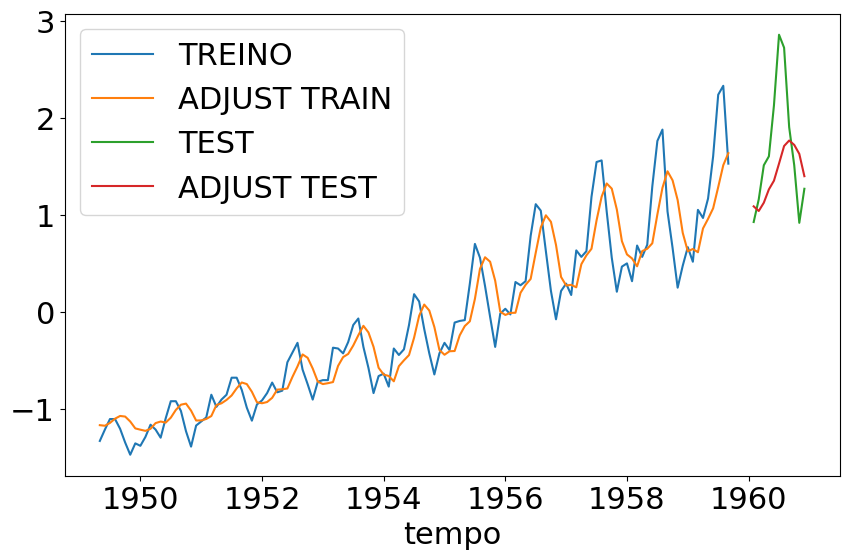

In [38]:
sns.lineplot(x='tempo', y=new_y_train, data=data[4:129], label='TREINO')
sns.lineplot(x='tempo', y=pd.DataFrame(predict_train_v4)[0].values, data=data[4:129], label='ADJUST TRAIN')
sns.lineplot(x='tempo', y=new_y_test, data=data[133:144], label='TEST')
sns.lineplot(x='tempo', y=pd.DataFrame(predict_test_v4)[0].values, data=data[133:144], label='ADJUST TEST')

In [39]:
url = 'https://raw.githubusercontent.com/alura-cursos/deeptime/aula4/bicicletas.csv'
bike = pd.read_csv(url)
bike.head()

,datas,contagem,temperatura,sensacao,umidade,vel_vento,clima,feriado,final_ds,estacao
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [40]:
sc_v2 = StandardScaler()
sc_v2.fit(bike['contagem'].values.reshape(-1,1))


StandardScaler()

In [41]:
bike['contagem'].values

array([182, 138, 134, ..., 337, 224, 139])

In [42]:
bike['contagem'].values.reshape(-1,1)

array([[182],
       [138],
       [134],
       ...,
       [337],
       [224],
       [139]])

In [43]:
y = sc_v2.transform(bike['contagem'].values.reshape(-1, 1))

In [44]:
tamanho_treino = int(len(bike)*0.9)
tamanho_teste = len(bike) - tamanho_treino

In [45]:
y_train = y[0:tamanho_treino]
y_test = y[tamanho_treino:len(bike)]

<Axes: xlabel='datas'>

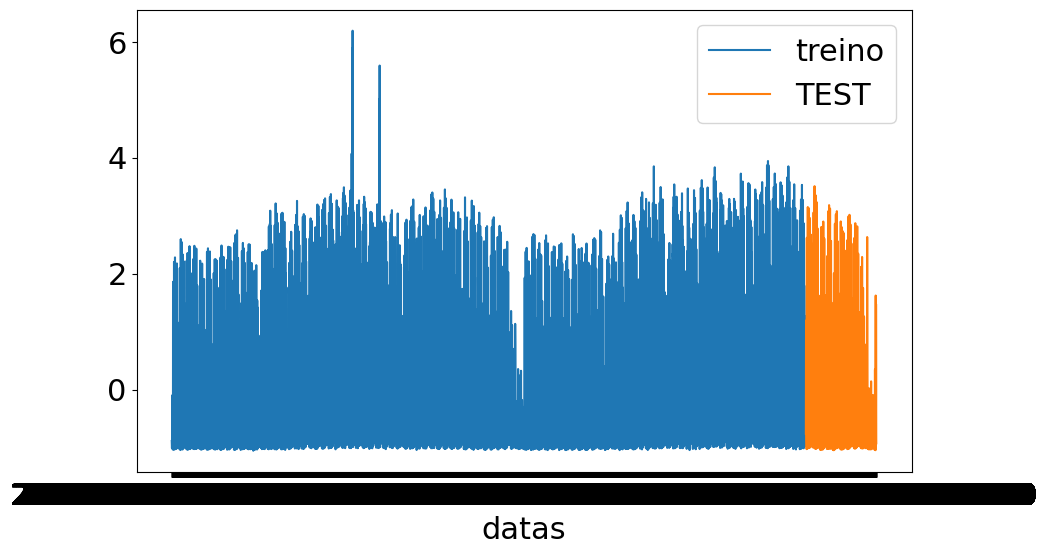

In [46]:
sns.lineplot(x='datas', y=y_train[:,0], data=bike[0:tamanho_treino], label='treino')
sns.lineplot(x='datas', y=y_test[:,0], data=bike[tamanho_treino:len(bike)], label='TEST')


A função separa dados ajusta os dados em novos array, o número de passos é o valor que será contido dentro do array.
Ex.:
<br>
[ 1, 2, 3, 4, 5]
<br>
Se passarmos para a função o n_passos = 1 retorna
<br>

[[1], [2], [3], [4], [5]]
<br>

Como novo array.
se passar o número de passos = 2 passos retorna

<br>

[ [1, 2], [2, 3], [3,4], [4,5] ]

Isso irá ajustar os dados necessário de Y para as previsões esperadas.

In [75]:
def separa_dados(vector, n_passos):
  x_novo, y_novo = [], []
  for i in range(n_passos, vector.shape[0]):
    x_novo.append(list(vector.loc[i-n_passos: i-1]))
    y_novo.append(vector.loc[i])
  x_novo, y_novo = np.array(x_novo), np.array(y_novo)
  return x_novo, y_novo

In [64]:
test = [ 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
test = pd.DataFrame(test)

resultado_v2_x, resultado_v2_y = separa_dados(test, 2)
test.shape[0]

________________________________________________________________________________________________________________________


20

In [74]:
resultado_v2_x = resultado_v2_x.reshape((resultado_v2_x.shape[0], resultado_v2_x.shape[1], 1))
resultado_v2_x

array([[[0]],

       [[0]],

       [[0]],

       [[0]],

       [[0]],

       [[0]],

       [[0]],

       [[0]],

       [[0]],

       [[0]],

       [[0]],

       [[0]],

       [[0]],

       [[0]],

       [[0]],

       [[0]],

       [[0]],

       [[0]]])

In [ ]:
vector_v2 = pd.DataFrame(y_test)[0]
vector = pd.DataFrame(y_train)[0]
new_x_train, new_y_train = separa_dados(vector, 10)
new_x_test, new_y_test = separa_dados(vector_v2, 10)

In [49]:
new_x_train = new_x_train.reshape((new_x_train.shape[0], new_x_train.shape[1], 1))

In [50]:
new_x_test = new_x_test.reshape((new_x_test.shape[0], new_x_test.shape[1], 1))

In [51]:
from tensorflow.keras.layers import LSTM

recorrente = Sequential(
    [
        LSTM(128, input_shape=(new_x_train.shape[1], new_x_train.shape[2])),
        Dense(units=1)
    ]
)

In [52]:
recorrente.compile(loss='mean_squared_error', optimizer='RMSProp')
recorrente.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 128)               66560     
                                                                 
 dense_10 (Dense)            (None, 1)                 129       
                                                                 
Total params: 66689 (260.50 KB)
Trainable params: 66689 (260.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [53]:
results = recorrente.fit(new_x_train, new_y_train, validation_data=(new_x_test, new_y_test), epochs=100)

Epoch 1/100
490/490 [==============================] - 13s 22ms/step - loss: 0.2980 - val_loss: 0.1152
Epoch 2/100
490/490 [==============================] - 10s 20ms/step - loss: 0.0868 - val_loss: 0.0545
Epoch 3/100
490/490 [==============================] - 10s 21ms/step - loss: 0.0584 - val_loss: 0.0405
Epoch 4/100
490/490 [==============================] - 11s 22ms/step - loss: 0.0491 - val_loss: 0.0380
Epoch 5/100
490/490 [==============================] - 10s 21ms/step - loss: 0.0446 - val_loss: 0.0483
Epoch 6/100
490/490 [==============================] - 10s 21ms/step - loss: 0.0421 - val_loss: 0.0304
Epoch 7/100
490/490 [==============================] - 9s 18ms/step - loss: 0.0394 - val_loss: 0.0226
Epoch 8/100
490/490 [==============================] - 10s 21ms/step - loss: 0.0381 - val_loss: 0.0247
Epoch 9/100
490/490 [==============================] - 10s 21ms/step - loss: 0.0368 - val_loss: 0.0259
Epoch 10/100
490/490 [==============================] - 11s 22ms/step - lo

In [54]:
y_adjust = recorrente.predict(new_x_train)

490/490 [==============================] - 5s 9ms/step


ValueError: Length of ndarray vectors must match length of `data` when both are used, but `data` has length 1566 and the vector passed to `y` has length 15662.

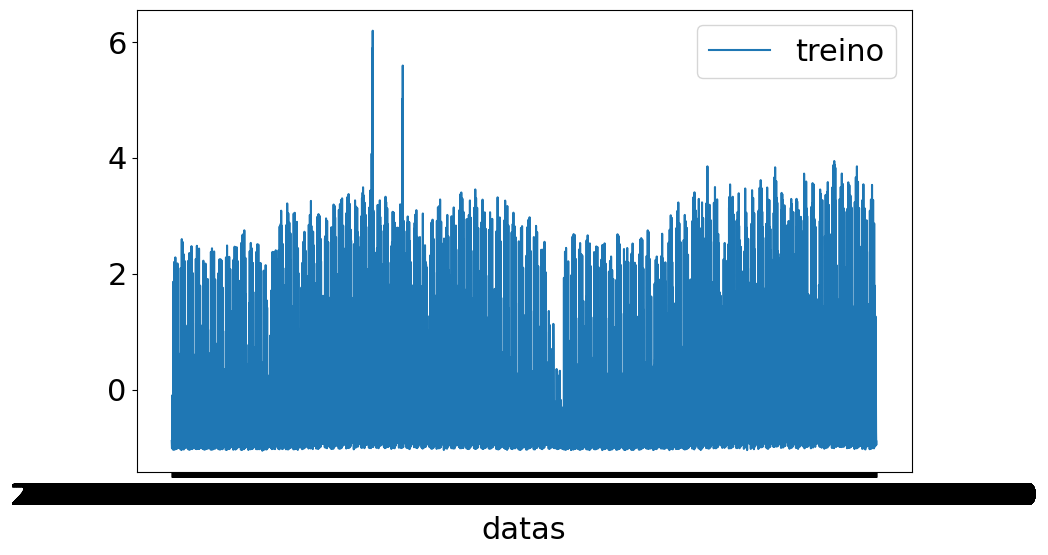

In [55]:
sns.lineplot(x='datas', y=y_train[:,0], data=bike[0:tamanho_treino], label='treino')
sns.lineplot(x='datas', y=y_adjust[:,0], data=bike[0:1566], label='Ajuste_treino')
plt.xticks(rotation=70)

In [ ]:
y_predict = recorrente.predict(new_x_test)

In [ ]:
sns.lineplot(x='datas', y=y_test[:,0], data=bike[tamanho_treino:len(bike)], label='Test')
sns.lineplot(x='datas', y=y_predict[:,0], data=bike[tamanho_treino+10:len(bike)], label='previsões')
plt.xticks(rotation=70)

In [ ]:
from tensorflow.keras.layers import GRU

recorrente_g = Sequential(
    [
        GRU(128, input_shape=(new_x_train.shape[1], new_x_train.shape[2])),
        Dense(units=1)
    ]
)

recorrente_g.summary()